In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

from sportsreference.nfl.teams import Teams
from sportsreference.nfl.boxscore import Boxscore
from sportsreference.nfl.roster import Player
from tqdm import tqdm



# Create sample Poisson Distribution

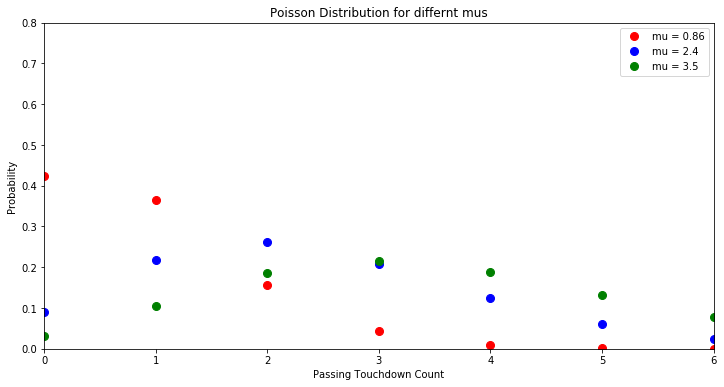

In [2]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = plt.axes(xlim=(0, 6), ylim=(0, 0.8))
# average, and for poisson, also variance
mu1 = 0.86
mu2 = 2.4
mu3 = 3.5
# get x values
x = np.arange(ss.poisson.ppf(0.01, 3.5), ss.poisson.ppf(0.99, 3.5))
ax.set_title("Poisson Distribution for differnt mus")
ax.set_xlabel("Passing Touchdown Count")
ax.set_ylabel("Probability")
ax.plot(x, ss.poisson.pmf(x, mu1), 'ro', ms=8, label='mu = 0.86')
ax.plot(x, ss.poisson.pmf(x, mu2), 'bo', ms=8, label='mu = 2.4')
ax.plot(x, ss.poisson.pmf(x, mu3), 'go', ms=8, label='mu = 3.5')
ax.legend()

plt.savefig("./figures/mu24.png", bbox_inches='tight')


# Step 1. Get Data.



In [3]:
path = './data/nflscrapR/play_by_play_data/regular_season/reg_pbp_2019.csv'
pbp = pd.read_csv(path)
pbp.head()


/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (167,168,169,170,175,176,179,180,183,184,189,190,191,192,195,196,204,205,206,219,220,221,222,223,224,227,228,232,233,234,239,241,242) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,...,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
0,35,2019090500,CHI,GB,GB,away,CHI,CHI,35.0,2019-09-05,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
1,50,2019090500,CHI,GB,GB,away,CHI,GB,75.0,2019-09-05,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
2,71,2019090500,CHI,GB,GB,away,CHI,GB,75.0,2019-09-05,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
3,95,2019090500,CHI,GB,GB,away,CHI,GB,75.0,2019-09-05,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
4,125,2019090500,CHI,GB,GB,away,CHI,GB,85.0,2019-09-05,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0


# Actual Touchdowns Per Game


In [4]:
df = pbp[['passer_player_id','passer_player_name','pass_touchdown']]

gb = df.groupby('passer_player_name')['pass_touchdown'].sum().reset_index().sort_values(by='pass_touchdown',ascending=False)

gb.head(50)

,passer_player_name,pass_touchdown
71,L.Jackson,36.0
61,J.Winston,33.0
96,R.Wilson,31.0
38,D.Prescott,30.0
52,J.Garoppolo,27.0
28,D.Brees,27.0
25,C.Wentz,27.0
79,M.Ryan,26.0
39,D.Watson,26.0
6,A.Rodgers,26.0


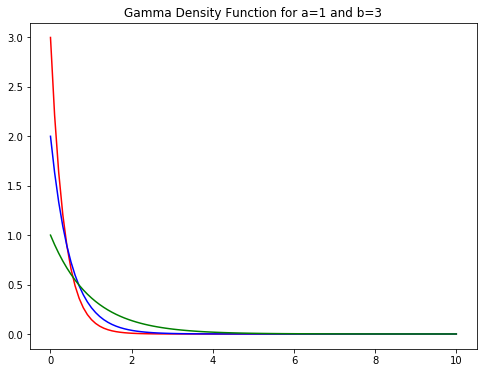

In [5]:
# Parameters of the prior gamma distribution.
a = 1 # shape
b = 3 # rate = 1/scale

c = 1
d = 2

e = 1
f = 1

x = np.linspace(start=0, stop=10, num=100)

plt.figure(figsize=(8, 6))
plt.plot(x, ss.gamma.pdf(x,a=a,scale=1/b), 'r-')
plt.plot(x, ss.gamma.pdf(x,a=c,scale=1/d), 'b-')
plt.plot(x, ss.gamma.pdf(x,a=e,scale=1/f), 'g-')
plt.title('Gamma Density Function for a={} and b={}'.format(a,b))

# Define the prior distribution.
prior = lambda x: ss.gamma.pdf(x, a=a, scale=1/b)

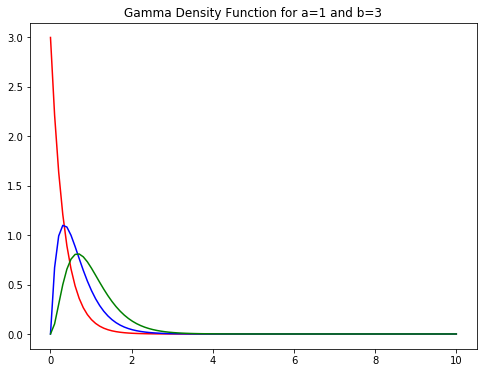

In [6]:
# Parameters of the prior gamma distribution.
a = 1 # shape
b = 3 # rate = 1/scale

c = 2
d = 3

e = 3
f = 3

x = np.linspace(start=0, stop=10, num=100)

plt.figure(figsize=(8, 6))
plt.plot(x, ss.gamma.pdf(x,a=a,scale=1/b), 'r-')
plt.plot(x, ss.gamma.pdf(x,a=c,scale=1/d), 'b-')
plt.plot(x, ss.gamma.pdf(x,a=e,scale=1/f), 'g-')
plt.title('Gamma Density Function for a={} and b={}'.format(a,b))

# Define the prior distribution.
prior = lambda x: ss.gamma.pdf(x, a=a, scale=1/b)

In [7]:
from tqdm import tqdm

seasons = list(range(2009, 2020))

td_pg = None

for season in tqdm(seasons[-6:]):
    
    path = './data/nflscrapR/play_by_play_data/regular_season/reg_pbp_{}.csv'.format(season)
    pbp = pd.read_csv(path)
    
    sea_df = pbp[['passer_player_name','game_id','pass_touchdown']]
    
    sea_df['season'] = season

    # same person, Josh Allen, has two names-- Jos.Allen and J.Allen
    sea_df['passer_player_name'] = sea_df['passer_player_name'].copy().str.replace("Jos.Allen",'J.Allen')
    
    # total pass touchdowns in season 
    gb = sea_df.groupby(['season','passer_player_name'])['pass_touchdown'].sum().reset_index().sort_values(by='pass_touchdown',ascending=False)

    # total games played in season
    gb2 = sea_df.groupby(['season','passer_player_name'])['game_id'].nunique().reset_index().sort_values(by='game_id',ascending=False)

    # merge together
    sea_ptd = pd.merge(gb, gb2, how='left', left_on=['season','passer_player_name'], right_on=['season','passer_player_name'])
    
    # concat with other seasons
    if td_pg is not None:
        td_pg = pd.concat([td_pg,sea_ptd],axis=0)
    else:
        td_pg = sea_ptd

# drop QBs with less than 8 games played
td_pg = td_pg.loc[td_pg.game_id > 7]

# actually get td pg
td_pg['td_pg'] = td_pg['pass_touchdown'].copy()/td_pg['game_id'].copy()

# sort
td_pg = td_pg.sort_values(by=['td_pg'], ascending=False)

td_pg.head(50)


  0%|          | 0/6 [00:00<?, ?it/s]/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (42,167,168,169,170,175,176,179,180,183,184,189,190,191,192,204,205,206,227,228,232,233,234,239,241,242) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://panda

,season,passer_player_name,pass_touchdown,game_id,td_pg
0,2018,P.Mahomes,50.0,16,3.125000
1,2017,C.Wentz,33.0,13,2.538462
0,2016,A.Rodgers,40.0,16,2.500000
0,2014,A.Luck,40.0,16,2.500000
6,2019,D.Brees,27.0,11,2.454545
1,2014,P.Manning,39.0,16,2.437500
1,2018,A.Luck,39.0,16,2.437500
0,2019,L.Jackson,36.0,15,2.400000
2,2014,A.Rodgers,38.0,16,2.375000
1,2016,M.Ryan,38.0,16,2.375000


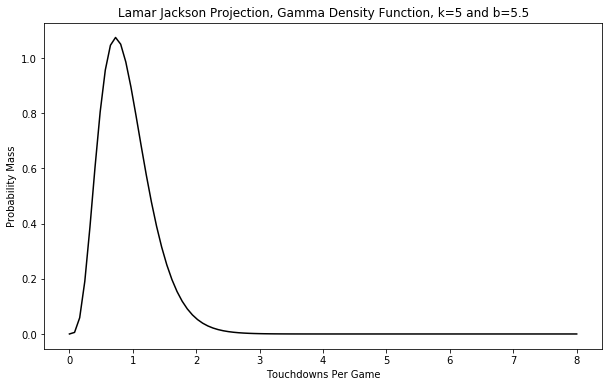

In [8]:
# Parameters of the prior gamma distribution.
k = 5 # shape
b = 5.5 # rate = 1/scale

x = np.linspace(start=0, stop=8, num=100)

plt.figure(figsize=(10, 6))
plt.plot(x, ss.gamma.pdf(x,a=k,scale=1/b), 'k-')
plt.title('Lamar Jackson Projection, Gamma Density Function, k={} and b={}'.format(k,b))

plt.xlabel("Touchdowns Per Game")
plt.ylabel("Probability Mass")
plt.savefig("./figures/LJprior.png")
plt.show()

In [9]:
import scipy.special as sp

# Define the likelihood function.
def likelihood(lam,y):
    
    factorials = np.apply_along_axis(
        lambda x: sp.gamma(x+1),
        axis=0,
        arr=y
    )
    
    numerator = np.exp(-lam*y.size)*(lam**y.sum())
    
    denominator = np.multiply.reduce(factorials)
    
    return numerator/denominator




2.3076923076923075


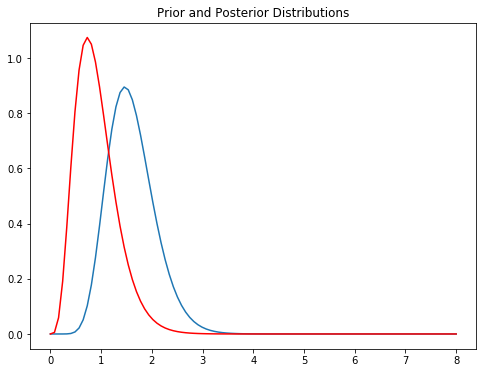

In [10]:
def posterior(lam,y):
    
    shape = k + y.sum()
    rate = b + y.size
    
    return ss.gamma.pdf(lam, shape, scale=1/rate), shape, rate

y = np.array([5, 2, 0, 3, 1, 0, 0, 1, 3, 4, 5, 1, 3, 5, 3, 1])

week=3

y_hat = y[:week-1]

print(np.mean(y[week:]))

y, shape, rate = posterior(x,y_hat)

plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.plot(x, ss.gamma.pdf(x,a=k,scale=1/b), 'r-')
plt.title('Prior and Posterior Distributions');


fig size: 72.0 DPI, size in inches [6. 4.]


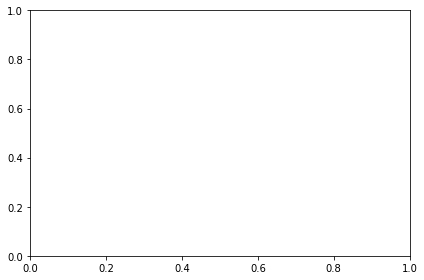

In [11]:
from matplotlib.animation import FuncAnimation, HTMLWriter
import sys

fig, ax = plt.subplots()
fig.set_tight_layout(True)

# Query the figure's on-screen size and DPI. Note that when saving the figure to
# a file, we need to provide a DPI for that separately.
print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))

week {}, shape:  5 rate:  5.5
week {}, shape:  10 rate:  6.5
week {}, shape:  12 rate:  7.5
week {}, shape:  12 rate:  8.5
week {}, shape:  15 rate:  9.5
week {}, shape:  16 rate:  10.5
week {}, shape:  16 rate:  11.5
week {}, shape:  16 rate:  12.5
week {}, shape:  17 rate:  13.5
week {}, shape:  20 rate:  14.5
week {}, shape:  24 rate:  15.5
week {}, shape:  29 rate:  16.5
week {}, shape:  30 rate:  17.5
week {}, shape:  33 rate:  18.5
week {}, shape:  38 rate:  19.5
week {}, shape:  41 rate:  20.5


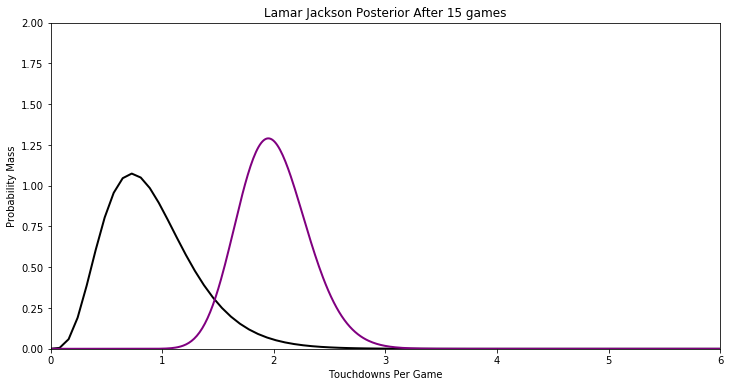

In [12]:
fig = plt.figure(figsize=(12,6))
ax = plt.axes(xlim=(0, 6), ylim=(0, 2))

prior, = ax.plot(x, ss.gamma.pdf(x,a=k,scale=1/b), lw=2, color='black')
post, = ax.plot([], [], lw=2, color='purple')

def init():
    post.set_data([], [])
    return post,

def animate(i):
    x = np.linspace(0, 6, 500)
    week=i 
    samples = np.array([5, 2, 0, 3, 1, 0, 0, 1, 3, 4, 5, 1, 3, 5, 3])
    y_hat = samples[:week]
    y, shape, rate = posterior(x,y_hat)
    post.set_data(x, y)
    
    print("week {}, shape: ", shape, "rate: ", rate)
    
    plt.title("Lamar Jackson Posterior After {} games".format(i))
    
    plt.xlabel("Touchdowns Per Game")
    plt.ylabel("Probability Mass")
    
    return post,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=16, interval=250, blit=True)

anim.save('./figures/lamar_update.gif', writer='imagemagick')

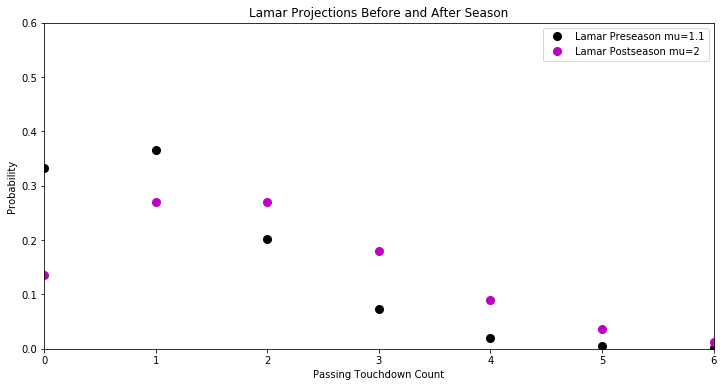

In [13]:

fig = plt.figure(figsize=(12,6))
ax = plt.axes(xlim=(0, 6), ylim=(0, 0.6))
# average, and for poisson, also variance
mu1 = 1.1
mu2 = 2
# get x values
x = np.arange(0, 7)
ax.set_title("Lamar Projections Before and After Season")
ax.set_xlabel("Passing Touchdown Count")
ax.set_ylabel("Probability")
ax.plot(x, ss.poisson.pmf(x, mu1), 'ko', ms=8, label='Lamar Preseason mu=1.1')
ax.plot(x, ss.poisson.pmf(x, mu2), 'mo', ms=8, label='Lamar Postseason mu=2')
ax.legend()

plt.savefig("./figures/lamar_poiss.png", bbox_inches='tight')

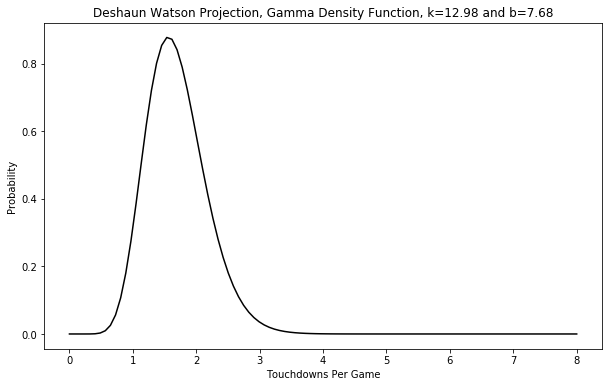

In [14]:
# Parameters of the prior gamma distribution.
k = 12.98 # shape
b = 7.68 # rate = 1/scale

x = np.linspace(start=0, stop=8, num=100)

plt.figure(figsize=(10, 6))
plt.plot(x, ss.gamma.pdf(x,a=k,scale=1/b), 'k-')
plt.title('Deshaun Watson Projection, Gamma Density Function, k={} and b={}'.format(k,b))

plt.xlabel("Touchdowns Per Game")
plt.ylabel("Probability")
plt.savefig("./figures/DWprior.png")
plt.show()


week {}, shape:  12.98 rate:  7.68
week {}, shape:  15.98 rate:  8.68
week {}, shape:  15.98 rate:  9.68
week {}, shape:  18.98 rate:  10.68
week {}, shape:  18.98 rate:  11.68
week {}, shape:  23.98 rate:  12.68
week {}, shape:  24.98 rate:  13.68
week {}, shape:  25.98 rate:  14.68
week {}, shape:  28.98 rate:  15.68
week {}, shape:  30.98 rate:  16.68
week {}, shape:  30.98 rate:  17.68
week {}, shape:  32.980000000000004 rate:  18.68
week {}, shape:  35.980000000000004 rate:  19.68
week {}, shape:  36.980000000000004 rate:  20.68
week {}, shape:  38.980000000000004 rate:  21.68
week {}, shape:  38.980000000000004 rate:  22.68


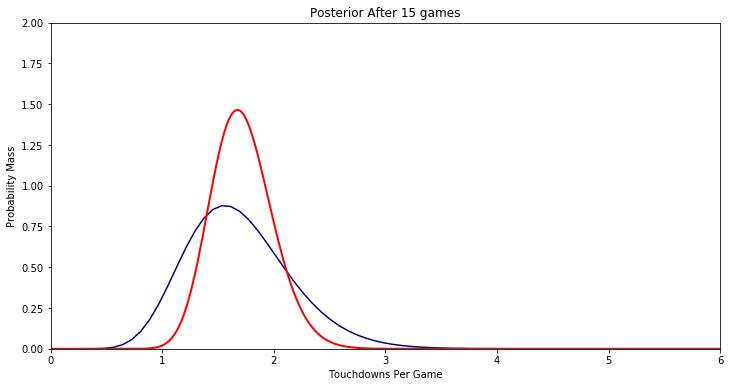

In [15]:
fig = plt.figure(figsize=(12,6))
ax = plt.axes(xlim=(0, 6), ylim=(0, 2))

k = 12.98
b = 7.68

plt.plot(x, ss.gamma.pdf(x,a=k,scale=1/b), color='navy')
post, = ax.plot([], [], lw=2, color='red')

def init():
    post.set_data([], [])
    return post,

def animate(i):
    x = np.linspace(0, 6, 500)
    week=i 
    samples = np.array([3,0,3,0,5,1,1,3,2,0,2,3,1,2,0])
    y_hat = samples[:week]
    y, shape, rate = posterior(x,y_hat)
    post.set_data(x, y)
    
    print("week {}, shape: ", shape, "rate: ", rate)
    
    plt.title("Posterior After {} games".format(i))
    
    plt.xlabel("Touchdowns Per Game")
    plt.ylabel("Probability Mass")
    
    return post,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=16, interval=250, blit=True)

anim.save('./figures/dw_update.gif', writer='imagemagick')

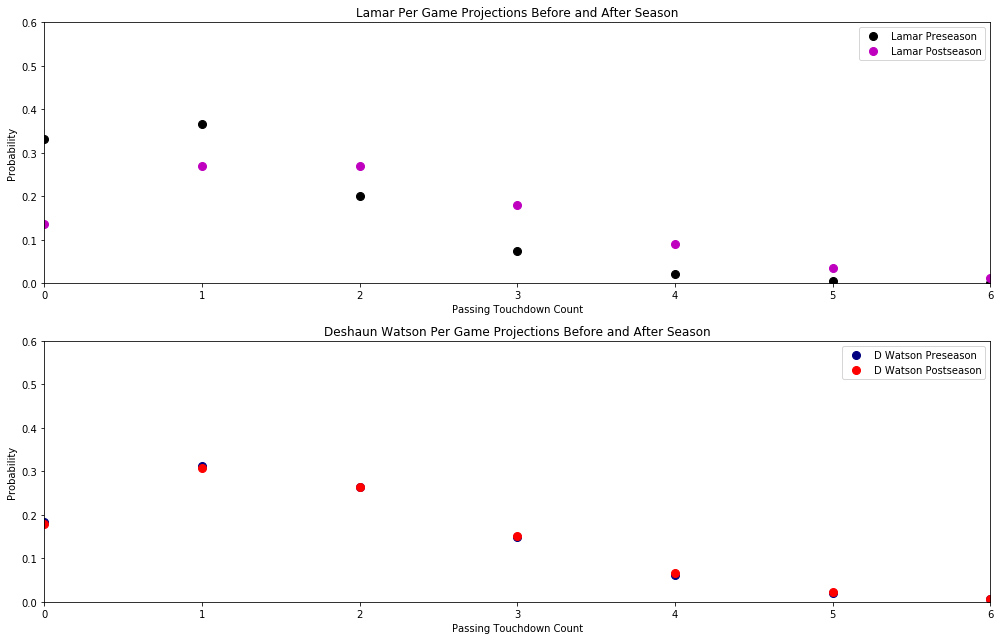

In [16]:
# average, and for poisson, also variance

# get x values
x = np.arange(0, 7)

mu1 = 1.1
mu2 = 2

mu3 = 1.69
mu4 = (38.98/22.68)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 9))
axes[0].plot(x, ss.poisson.pmf(x, mu1), 'ko', ms=8, label='Lamar Preseason')
axes[0].plot(x, ss.poisson.pmf(x, mu2), 'mo', ms=8, label='Lamar Postseason')

axes[1].plot(x, ss.poisson.pmf(x, mu3), 'o', color='navy', ms=8, label='D Watson Preseason')
axes[1].plot(x, ss.poisson.pmf(x, mu4), 'o', color='red', ms=8, label='D Watson Postseason')

axes[0].set_title("Lamar Per Game Projections Before and After Season")
axes[0].set_xlabel("Passing Touchdown Count")
axes[0].set_ylabel("Probability")

axes[1].set_title("Deshaun Watson Per Game Projections Before and After Season")
axes[1].set_xlabel("Passing Touchdown Count")
axes[1].set_ylabel("Probability")

axes[0].set_xlim(0,6)
axes[1].set_xlim(0,6)

axes[0].set_ylim(0,0.6)
axes[1].set_ylim(0,0.6)

axes[0].legend()
axes[1].legend()

plt.tight_layout()
plt.savefig("./figures/lamar_and_dw.png")

In [17]:
path = './data/nflscrapR/play_by_play_data/regular_season/reg_pbp_2019.csv'
pbp = pd.read_csv(path)

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (167,168,169,170,175,176,179,180,183,184,189,190,191,192,195,196,204,205,206,219,220,221,222,223,224,227,228,232,233,234,239,241,242) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
qb = pbp[['game_id','passer_player_id','passer_player_name','pass_touchdown']]
qb_gb = qb.groupby(['game_id','passer_player_name'])['pass_touchdown'].sum().reset_index()
qb_gb.sort_values(by=['pass_touchdown'],ascending=False)


,game_id,passer_player_name,pass_touchdown
475,2019120806,D.Brees,5.0
500,2019121200,L.Jackson,5.0
419,2019112500,L.Jackson,5.0
308,2019110308,R.Wilson,5.0
11,2019090803,L.Jackson,5.0
...,...,...,...
192,2019101301,L.Jackson,0.0
191,2019101301,A.Dalton,0.0
454,2019120110,G.Gilbert,0.0
188,2019101000,T.Brady,0.0


In [19]:
dfn = pbp[['game_id','defteam','pass_touchdown']]
dfn_gb = dfn.groupby(['game_id','defteam'])['pass_touchdown'].sum().reset_index()
# dfn_gb.sort_values(by=['pass_touchdown'],ascending=False)

dfn_pg = dfn_gb.groupby(['defteam'])['pass_touchdown'].mean().reset_index()
dfn_pg.sort_values(by=['pass_touchdown'], ascending=False)

,defteam,pass_touchdown
18,MIA,2.4375
0,ARI,2.3750
31,WAS,2.1875
12,HOU,2.0625
24,OAK,2.0625
10,DET,2.0625
29,TB,1.8750
22,NYG,1.8750
13,IND,1.8125
1,ATL,1.7500


In [20]:
seasons = list(range(2009, 2019))
seasons

[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [21]:
dfn_all = None

for season in seasons[-5:]:
    
    path = './data/nflscrapR/play_by_play_data/regular_season/reg_pbp_{}.csv'.format(season)
    pbp = pd.read_csv(path)
    pbp['defteam'] = pbp['defteam'].str.replace('JAC','JAX')
    pbp['defteam'] = pbp['defteam'].str.replace('SD','LAC')
    pbp['defteam'] = pbp['defteam'].str.replace('STL','LA')
    dfn = pbp[['game_id','defteam','pass_touchdown']]
    dfn_gb = dfn.groupby(['game_id','defteam'])['pass_touchdown'].sum().reset_index()
    # dfn_gb.sort_values(by=['pass_touchdown'],ascending=False)

    dfn_pg = dfn_gb.groupby(['defteam'])['pass_touchdown'].mean().reset_index()
    dfn_pg = dfn_pg.rename(columns={'pass_touchdown':'ptd_pg_{}'.format(season)})
    
    if dfn_all is not None:
        dfn_all = pd.merge(dfn_all, dfn_pg, how='left',on=['defteam','defteam'])
    else:
        dfn_all = dfn_pg


/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (42,167,168,169,170,175,176,179,180,183,184,189,190,191,192,204,205,206,227,228,232,233,234,239,241,242) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (42,167,168,175,176,179,180,183,184,189,190,191,192,204,205,206,227,228,232,233,234,239,241,242) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (167,168,169,170,175,176,179,180,183,184,189,190,191,192,195,196,199,200,204,205,206,227,228,232,233,234,239,241,242) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivit

In [22]:
dfn_all['proj_2019'] = 0.4 * dfn_all['ptd_pg_2018'].copy() + 0.25 * dfn_all['ptd_pg_2017'].copy() + 0.175 *dfn_all['ptd_pg_2016'].copy() + 0.125*dfn_all['ptd_pg_2015'].copy() + 0.05 * dfn_all['ptd_pg_2014'].copy()

dfn_all.sort_values(by=['proj_2019'],ascending=True)

,defteam,ptd_pg_2014,ptd_pg_2015,ptd_pg_2016,ptd_pg_2017,ptd_pg_2018,proj_2019
19,MIN,1.6250,1.5000,1.3750,0.8125,0.9375,1.087500
14,JAX,1.5000,1.8125,1.2500,1.0625,1.0625,1.210938
3,BUF,1.0000,1.8750,1.1875,0.8750,1.3750,1.260938
27,SEA,1.0625,0.8750,1.0000,1.1875,1.6250,1.284375
17,LAC,1.5000,1.3750,1.3125,1.0625,1.4375,1.317187
0,ARI,1.3750,1.5000,1.3125,1.5000,1.3125,1.385938
2,BAL,1.3750,1.8750,1.7500,1.1250,1.3125,1.415625
5,CHI,2.1250,1.9375,1.3750,1.1250,1.3750,1.420312
8,DAL,1.3750,1.1875,1.5625,1.7500,1.3750,1.478125
9,DEN,1.8125,1.1875,0.8125,1.8125,1.6250,1.484375


There were two projections that stood out to me as bogus, and so I decided to change them.

Arizona hired Kliff Kingsbury during the offseason, and he installed the fastest offense in the league. He also was not hired because of his defensive prowess. As a result, Arizona would allow significantly more possessions than in the past, and likely either 1) succeed on offense enough to force the other team to pass or 2) fail hard, and let the opponent rack up scores. For this reason I decided to add to their expectation.

On the other hand, the 49ers have had two straight seasons of devastating injuries, had a historically low, 5 standard deviation off interception rate (2 all year in 2018), and drafted Nick Bosa, a defensive stud, second overall. Having them last in projected pass defense did not seem like a good idea.  

In [23]:

dfn_all.loc[dfn_all['defteam']=='ARI', 'proj_2019'] = 1.385938 + 0.35
dfn_all.loc[dfn_all['defteam']=='SF', 'proj_2019'] = 1.882812 - 0.35


In [24]:
dfn_all.sort_values(by=['proj_2019'],ascending=True)


,defteam,ptd_pg_2014,ptd_pg_2015,ptd_pg_2016,ptd_pg_2017,ptd_pg_2018,proj_2019
19,MIN,1.6250,1.5000,1.3750,0.8125,0.9375,1.087500
14,JAX,1.5000,1.8125,1.2500,1.0625,1.0625,1.210938
3,BUF,1.0000,1.8750,1.1875,0.8750,1.3750,1.260938
27,SEA,1.0625,0.8750,1.0000,1.1875,1.6250,1.284375
17,LAC,1.5000,1.3750,1.3125,1.0625,1.4375,1.317187
2,BAL,1.3750,1.8750,1.7500,1.1250,1.3125,1.415625
5,CHI,2.1250,1.9375,1.3750,1.1250,1.3750,1.420312
8,DAL,1.3750,1.1875,1.5625,1.7500,1.3750,1.478125
9,DEN,1.8125,1.1875,0.8125,1.8125,1.6250,1.484375
13,IND,1.6875,1.8125,1.6875,1.4375,1.3125,1.490625


In [25]:
dfn_all = dfn_all[['defteam','proj_2019']]
dfn_all = dfn_all.reset_index(drop=True)
dfn_all['dfn_i'] = dfn_all.index

In [26]:
path = './data/nflscrapR/play_by_play_data/regular_season/reg_pbp_2019.csv'
pbp = pd.read_csv(path)



In [27]:
qb = pbp[['game_id','passer_player_name','pass_touchdown']]

qb['passer_player_name'] = qb['passer_player_name'].copy().str.replace("Jos.Allen",'J.Allen')
qb_gb = qb.groupby(['game_id','passer_player_name'])['pass_touchdown'].sum().reset_index()
# dfn_gb.sort_values(by=['pass_touchdown'],ascending=False)

qb_pg = qb_gb.groupby(['passer_player_name'])['pass_touchdown'].mean().reset_index()

print(len(qb_pg))
qb_pg = qb_pg.loc[qb_pg['pass_touchdown']>0]
print(len(qb_pg))

qb_pg.sort_values(by=['pass_touchdown'], ascending=False)


109
58


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,passer_player_name,pass_touchdown
28,D.Brees,2.454545
70,L.Jackson,2.400000
80,M.Stafford,2.375000
61,J.Winston,2.062500
11,B.Hoyer,2.000000
94,R.Tannehill,2.000000
95,R.Wilson,1.937500
38,D.Prescott,1.875000
85,P.Mahomes,1.857143
35,D.Jones,1.846154


In [28]:
proj_list = [
    ['D.Brees',30.4/16],
    ['L.Jackson',17.2/16],
    ['M.Stafford',24.0/16],
    ['J.Winston',27.5/16],
    ['R.Wilson',27.9/16],
    ['D.Prescott',23.9/16],
    ['P.Mahomes',35.8/16],
    ['K.Cousins',27.4/16],
    ['M.Ryan',30.2/16],
    ['D.Watson',27/16],
    ['J.Garoppolo',25.2/16],
    ['C.Wentz',29.8/16],
    ['A.Rodgers',29.3/16],
    ['T.Brady',29.7/16],
    ['S.Darnold',22.5/16],
    ['P.Rivers',29.8/16],
    ['J.Goff',30.2/16],
    ['B.Mayfield',30.9/16],
    ['J.Allen',17.3/16],
    ['D.Carr',24.2/16],
    ['A.Dalton',24.7/16],
    ['K.Murray',21.1/16],
    ['M.Trubisky',25.4/16],
    ['J.Brissett',18.1/16]
]

qb_proj = pd.DataFrame(proj_list, columns=['passer_player_name','projection'])

qb_proj = qb_proj.sort_values(by=['projection'],ascending=False)

qb_proj = qb_proj.reset_index(drop=True)

# theta = mu/0.22
# k = mu * theta

qb_proj['rate'] = qb_proj['projection'].copy()/0.22
qb_proj['shape_'] = qb_proj['rate'].copy() * qb_proj['projection'].copy()

qb_proj.to_csv('./data/2019_projections.csv', index=False)

qb_proj['qb_i'] = qb_proj.index

qb_proj


,passer_player_name,projection,rate,shape_,qb_i
0,P.Mahomes,2.23750,10.170455,22.756392,0
1,B.Mayfield,1.93125,8.778409,16.953303,1
2,D.Brees,1.90000,8.636364,16.409091,2
3,M.Ryan,1.88750,8.579545,16.193892,3
4,J.Goff,1.88750,8.579545,16.193892,4
5,P.Rivers,1.86250,8.465909,15.767756,5
6,C.Wentz,1.86250,8.465909,15.767756,6
7,T.Brady,1.85625,8.437500,15.662109,7
8,A.Rodgers,1.83125,8.323864,15.243075,8
9,R.Wilson,1.74375,7.926136,13.821200,9


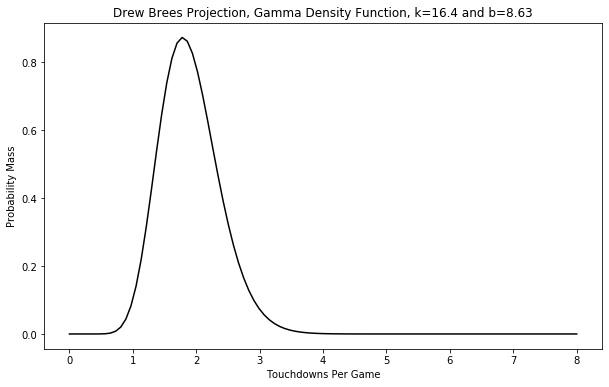

In [29]:
# drew brees 
k = 16.4 # shape
b = 8.63 # rate = 1/scale

x = np.linspace(start=0, stop=8, num=100)

plt.figure(figsize=(10, 6))
plt.plot(x, ss.gamma.pdf(x,a=k,scale=1/b), 'k-')
plt.title('Drew Brees Projection, Gamma Density Function, k={} and b={}'.format(k,b))

plt.xlabel("Touchdowns Per Game")
plt.ylabel("Probability Mass")
plt.savefig("./figures/DBprior.png")
plt.show()

In [30]:
dfn_all['rate'] = dfn_all['proj_2019'].copy()/0.18
dfn_all['shape_'] = dfn_all['rate'].copy() * dfn_all['proj_2019'].copy()

In [31]:
# actual data
df = pbp[['game_id','passer_player_name','defteam','pass_touchdown']]

gb = df.groupby(['game_id','passer_player_name','defteam'])['pass_touchdown'].sum().reset_index()
gb

,game_id,passer_player_name,defteam,pass_touchdown
0,2019090500,A.Rodgers,CHI,1.0
1,2019090500,M.Trubisky,GB,0.0
2,2019090800,C.Newton,LA,0.0
3,2019090800,J.Goff,CAR,1.0
4,2019090801,B.Mayfield,TEN,1.0
...,...,...,...,...
616,2019122914,B.Hundley,LA,0.0
617,2019122914,J.Goff,ARI,3.0
618,2019122914,K.Murray,LA,2.0
619,2019122915,J.Garoppolo,SEA,0.0


In [32]:
gb.isnull().sum(axis=0)

game_id               0
passer_player_name    0
defteam               0
pass_touchdown        0
dtype: int64

In [33]:
# merge index to work as team/qb id
qb_idx = qb_proj[['passer_player_name','qb_i']]
dfn_idx = dfn_all[['defteam','dfn_i']]

gb = pd.merge(gb, qb_idx, how='left', on=['passer_player_name','passer_player_name'])
gb = pd.merge(gb, dfn_idx, how='left', on=['defteam','defteam'])


In [34]:
gb = gb.dropna(subset=['qb_i','dfn_i'])

gb['pass_touchdown'] = gb['pass_touchdown'].copy().astype(int)
gb['qb_i'] = gb['qb_i'].copy().astype(int)
gb['dfn_i'] = gb['dfn_i'].copy().astype(int)

gb.head()

,game_id,passer_player_name,defteam,pass_touchdown,qb_i,dfn_i
0,2019090500,A.Rodgers,CHI,1,8,5
1,2019090500,M.Trubisky,GB,0,13,11
3,2019090800,J.Goff,CAR,1,4,4
4,2019090801,B.Mayfield,TEN,1,1,30
9,2019090802,P.Mahomes,JAX,3,0,14


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [dfn_star, qb_star, intercept, sd_dfn, sd_qb]
Sampling 4 chains, 0 divergences: 100%|██████████| 8000/8000 [00:03<00:00, 2500.98draws/s]


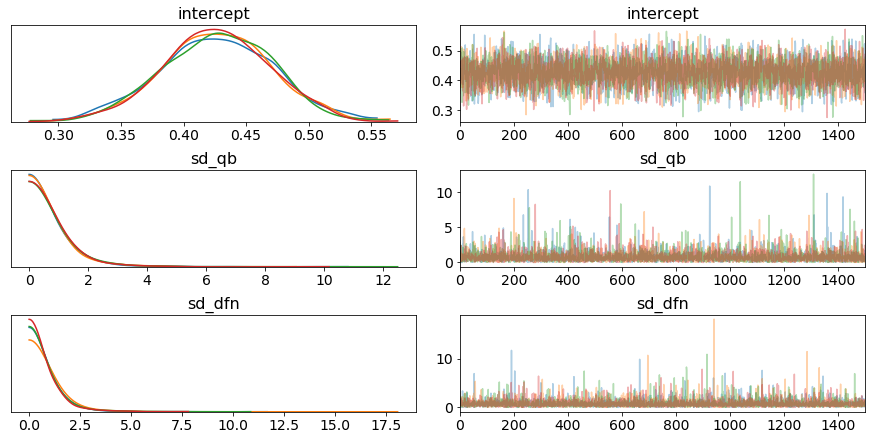

In [35]:
import pymc3 as pm, theano.tensor as tt

# gamma priors for qbs
qb_a = qb_proj.shape_.values
qb_b = qb_proj.rate.values

# gamma priors for defenses
dfn_a = dfn_all.shape_.values
dfn_b = dfn_all.rate.values

num_qbs = len(qb_proj)
num_dfns = len(dfn_all)

# observed data, and index for QB and defense to use as ID
obs_tds = gb.pass_touchdown.values
qb = gb.qb_i.values
dfn = gb.dfn_i.values

with pm.Model() as model:
    # "fixed effects"
    # I expect QB & Defense skill to be normally distributed with a std dev of 0.75
    # I make no assumptions about the league average rate (thus "pm.Flat")
    sd_qb = pm.HalfStudentT('sd_qb', nu=3, sigma=0.75)
    sd_dfn = pm.HalfStudentT('sd_dfn', nu=3, sigma=0.75)
    intercept = pm.Flat('intercept')

    # "random effects"
    # individual-specific prior
    qb_star = pm.Gamma("qb_star", alpha=qb_a, beta=qb_b, shape=num_qbs)
    dfn_star = pm.Gamma("dfn_star", alpha=dfn_b, beta=dfn_b, shape=num_dfns)
    
    # if I wanted to just plug in an average (model doesn't work nearly as well)
#     qb_star = pm.Normal("qb_star", mu=0, sigma=sd_qb, shape=num_qbs)
#     dfn_star = pm.Normal("dfn_star", mu=0, sigma=sd_dfn, shape=num_dfns)

    qbs = pm.Deterministic('qbs', qb_star - tt.mean(qb_star))
    dfns = pm.Deterministic('dfns', dfn_star - tt.mean(dfn_star))
    
    # link function
    lam = tt.exp(intercept + qbs[qb] + dfns[dfn])

    # likelihood of observed data
    pass_tds = pm.Poisson('pass_tds', mu=lam, observed=obs_tds)
    
with model:
    trace = pm.sample(1500, tune=500, cores=4)

pm.traceplot(trace, var_names=['intercept', 'sd_qb', 'sd_dfn']);

/usr/local/lib/python3.7/site-packages/pymc3/stats/__init__.py:43: UserWarning: gelman_rubin has been deprecated. In the future, use rhat instead.
  warnings.warn("gelman_rubin has been deprecated. In the future, use rhat instead.")


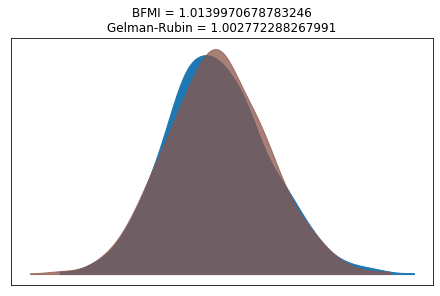

In [36]:
bfmi = np.max(pm.stats.bfmi(trace))
max_gr = max(np.max(gr_stats) for gr_stats in pm.stats.gelman_rubin(trace).values()).values


(pm.energyplot(trace, legend=False, figsize=(6, 4))
   .set_title("BFMI = {}\nGelman-Rubin = {}".format(bfmi, max_gr)));

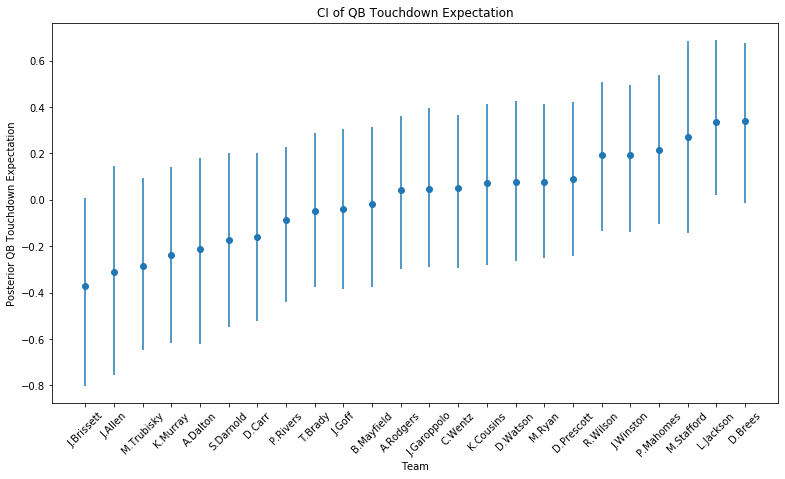

In [37]:
df_hpd = pd.DataFrame(pm.stats.hpd(trace['qbs']),
                      columns=['hpd_low', 'hpd_high'],
                      index=qb_proj.passer_player_name.values)
df_median = pd.DataFrame(np.quantile(trace['qbs'], 0.5, axis=0),
                         columns=['hpd_median'],
                         index=qb_proj.passer_player_name.values)
df_hpd = df_hpd.join(df_median)
df_hpd['relative_lower'] = df_hpd.hpd_median - df_hpd.hpd_low
df_hpd['relative_upper'] = df_hpd.hpd_high - df_hpd.hpd_median
df_hpd = df_hpd.sort_values(by='hpd_median')
df_hpd = df_hpd.reset_index()
df_hpd['x'] = df_hpd.index + .5


fig, axs = plt.subplots(figsize=(13,7))
axs.errorbar(df_hpd.x, df_hpd.hpd_median,
             yerr=(df_hpd[['relative_lower', 'relative_upper']].values).T,
             fmt='o')
axs.set_title('CI of QB Touchdown Expectation')
axs.set_xlabel('Team')
axs.set_ylabel('Posterior QB Touchdown Expectation')
_= axs.set_xticks(df_hpd.index + .5)
_= axs.set_xticklabels(df_hpd['index'].values, rotation=45)

plt.savefig('./figures/CI_QB.png')

In [38]:
df_median.sort_values(by=['hpd_median'], ascending=False)


,hpd_median
D.Brees,0.340856
L.Jackson,0.337499
M.Stafford,0.271203
P.Mahomes,0.216244
J.Winston,0.192844
R.Wilson,0.192778
D.Prescott,0.087607
M.Ryan,0.077186
D.Watson,0.075398
K.Cousins,0.070801


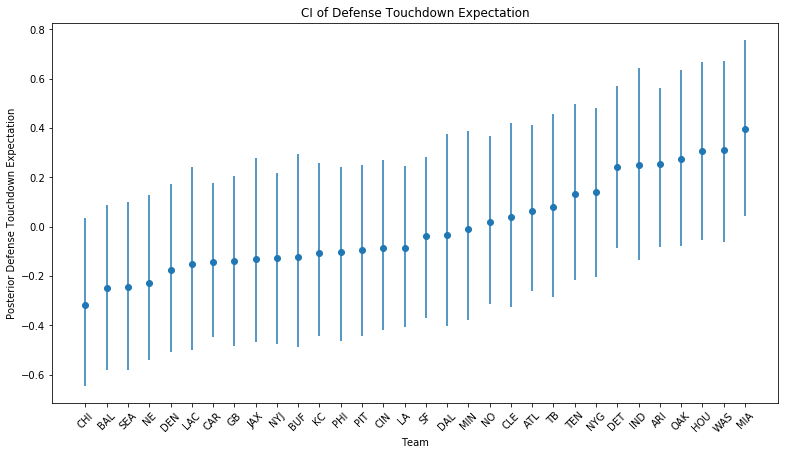

In [39]:
df_hpd = pd.DataFrame(pm.stats.hpd(trace['dfns']),
                      columns=['hpd_low', 'hpd_high'],
                      index=dfn_all.defteam.values)
df_median = pd.DataFrame(np.quantile(trace['dfns'], 0.5, axis=0),
                         columns=['hpd_median'],
                         index=dfn_all.defteam.values)
df_hpd = df_hpd.join(df_median)
df_hpd['relative_lower'] = df_hpd.hpd_median - df_hpd.hpd_low
df_hpd['relative_upper'] = df_hpd.hpd_high - df_hpd.hpd_median
df_hpd = df_hpd.sort_values(by='hpd_median')
df_hpd = df_hpd.reset_index()
df_hpd['x'] = df_hpd.index + .5


fig, axs = plt.subplots(figsize=(13,7))
axs.errorbar(df_hpd.x, df_hpd.hpd_median,
             yerr=(df_hpd[['relative_lower', 'relative_upper']].values).T,
             fmt='o')
axs.set_title('CI of Defense Touchdown Expectation')
axs.set_xlabel('Team')
axs.set_ylabel('Posterior Defense Touchdown Expectation')
_= axs.set_xticks(df_hpd.index + .5)
_= axs.set_xticklabels(df_hpd['index'].values, rotation=45)

plt.savefig('./figures/CI_Dfn.png')

In [40]:
# brissett vs. chicago
print(np.exp(0.425 -.315786 -0.377626))

# brees vs. miami
print(np.exp(0.425 + 0.394984 +0.344171))



0.7645927040073881
3.203215022598737


In [41]:
df_median.sort_values(by=['hpd_median'])

,hpd_median
CHI,-0.319224
BAL,-0.247420
SEA,-0.245650
NE,-0.228245
DEN,-0.176110
LAC,-0.150643
CAR,-0.142416
GB,-0.140622
JAX,-0.129237
NYJ,-0.128993


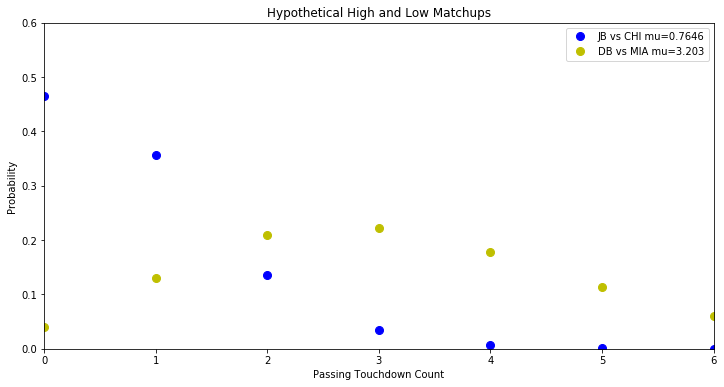

In [42]:
fig = plt.figure(figsize=(12,6))
ax = plt.axes(xlim=(0, 6), ylim=(0, 0.6))
# average, and for poisson, also variance
mu1 = 0.7646
mu2 = 3.203
# get x values
x = np.arange(0, 7)
ax.set_title("Hypothetical High and Low Matchups")
ax.set_xlabel("Passing Touchdown Count")
ax.set_ylabel("Probability")
ax.plot(x, ss.poisson.pmf(x, mu1), 'bo', ms=8, label='JB vs CHI mu=0.7646')
ax.plot(x, ss.poisson.pmf(x, mu2), 'yo', ms=8, label='DB vs MIA mu=3.203')
ax.legend()

plt.savefig("./figures/comp_poiss.png", bbox_inches='tight')

# Super Bowl

In [43]:
po_pbp = pd.read_csv("./data/nflscrapR/play_by_play_data/post_season/post_pbp_2019.csv")
po_pbp = po_pbp.drop(columns=['Unnamed: 0'])


In [44]:
pbp = pd.concat([pbp,po_pbp],axis=0)

df = pbp[['game_id','passer_player_name','defteam','pass_touchdown']]

gb = df.groupby(['game_id','passer_player_name','defteam'])['pass_touchdown'].sum().reset_index()

# merge index to work as team/qb id
gb = pd.merge(gb, qb_idx, how='left', on=['passer_player_name','passer_player_name'])
gb = pd.merge(gb, dfn_idx, how='left', on=['defteam','defteam'])

gb = gb.dropna(subset=['qb_i','dfn_i'])

gb['pass_touchdown'] = gb['pass_touchdown'].copy().astype(int)
gb['qb_i'] = gb['qb_i'].copy().astype(int)
gb['dfn_i'] = gb['dfn_i'].copy().astype(int)

gb.head()


,game_id,passer_player_name,defteam,pass_touchdown,qb_i,dfn_i
0,2019090500,A.Rodgers,CHI,1,8,5
1,2019090500,M.Trubisky,GB,0,13,11
3,2019090800,J.Goff,CAR,1,4,4
4,2019090801,B.Mayfield,TEN,1,1,30
9,2019090802,P.Mahomes,JAX,3,0,14


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [dfn_star, qb_star, intercept, sd_dfn, sd_qb]
Sampling 4 chains, 0 divergences: 100%|██████████| 8000/8000 [00:03<00:00, 2389.52draws/s]


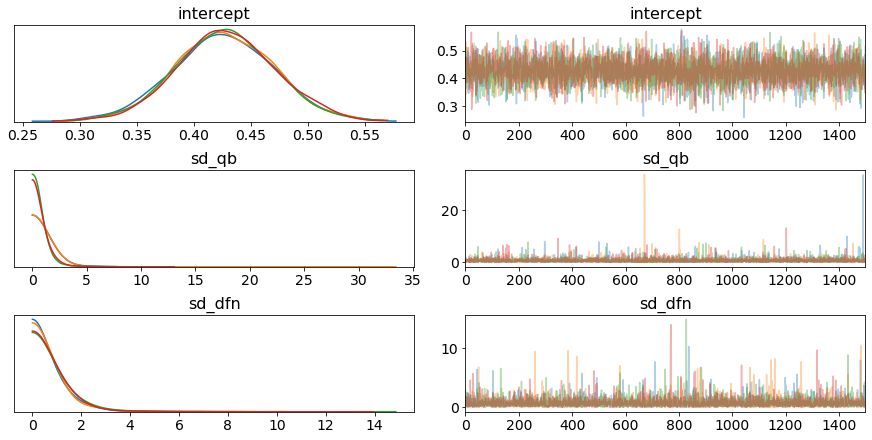

In [45]:
with pm.Model() as model:
    # "fixed effects"
    # I expect QB & Defense skill to be normally distributed with a std dev of 0.75
    # I make no assumptions about the league average rate (thus "pm.Flat")
    sd_qb = pm.HalfStudentT('sd_qb', nu=3, sigma=0.75)
    sd_dfn = pm.HalfStudentT('sd_dfn', nu=3, sigma=0.75)
    intercept = pm.Flat('intercept')

    # "random effects"
    # individual-specific prior
    qb_star = pm.Gamma("qb_star", alpha=qb_a, beta=qb_b, shape=num_qbs)
    dfn_star = pm.Gamma("dfn_star", alpha=dfn_b, beta=dfn_b, shape=num_dfns)
    
    # if I wanted to just plug in an average (model doesn't work nearly as well)
#     qb_star = pm.Normal("qb_star", mu=0, sigma=sd_qb, shape=num_qbs)
#     dfn_star = pm.Normal("dfn_star", mu=0, sigma=sd_dfn, shape=num_dfns)

    qbs = pm.Deterministic('qbs', qb_star - tt.mean(qb_star))
    dfns = pm.Deterministic('dfns', dfn_star - tt.mean(dfn_star))
    
    # link function
    lam = tt.exp(intercept + qbs[qb] + dfns[dfn])

    # likelihood of observed data
    pass_tds = pm.Poisson('pass_tds', mu=lam, observed=obs_tds)
    
with model:
    trace = pm.sample(1500, tune=500, cores=4)

pm.traceplot(trace, var_names=['intercept', 'sd_qb', 'sd_dfn']);

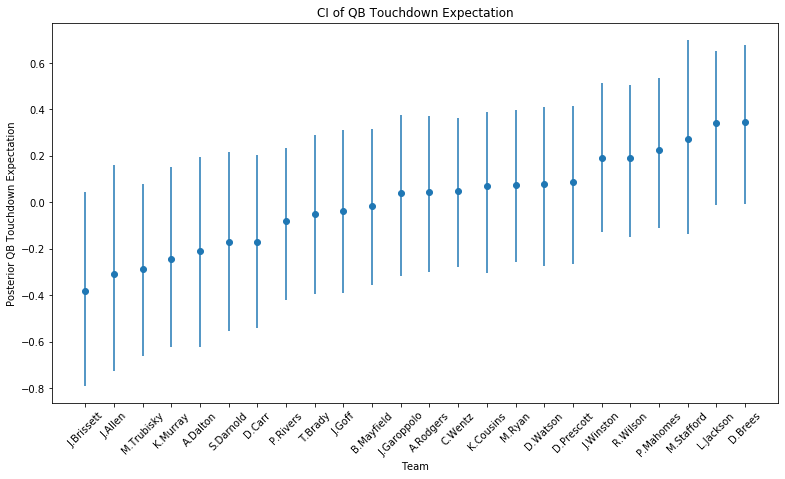

In [46]:
df_hpd = pd.DataFrame(pm.stats.hpd(trace['qbs']),
                      columns=['hpd_low', 'hpd_high'],
                      index=qb_proj.passer_player_name.values)
df_median_qb = pd.DataFrame(np.quantile(trace['qbs'], 0.5, axis=0),
                         columns=['hpd_median'],
                         index=qb_proj.passer_player_name.values)
df_hpd = df_hpd.join(df_median_qb)
df_hpd['relative_lower'] = df_hpd.hpd_median - df_hpd.hpd_low
df_hpd['relative_upper'] = df_hpd.hpd_high - df_hpd.hpd_median
df_hpd = df_hpd.sort_values(by='hpd_median')
df_hpd = df_hpd.reset_index()
df_hpd['x'] = df_hpd.index + .5


fig, axs = plt.subplots(figsize=(13,7))
axs.errorbar(df_hpd.x, df_hpd.hpd_median,
             yerr=(df_hpd[['relative_lower', 'relative_upper']].values).T,
             fmt='o')
axs.set_title('CI of QB Touchdown Expectation')
axs.set_xlabel('Team')
axs.set_ylabel('Posterior QB Touchdown Expectation')
_= axs.set_xticks(df_hpd.index + .5)
_= axs.set_xticklabels(df_hpd['index'].values, rotation=45)

plt.savefig('./figures/CI_QB_po.png')

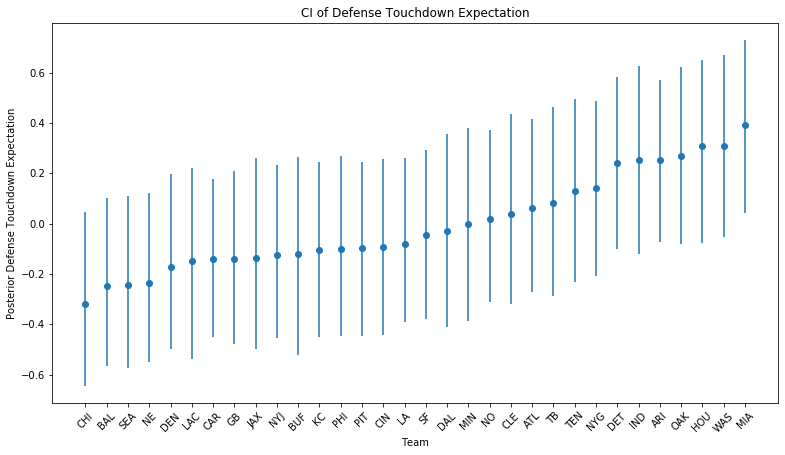

In [47]:
df_hpd = pd.DataFrame(pm.stats.hpd(trace['dfns']),
                      columns=['hpd_low', 'hpd_high'],
                      index=dfn_all.defteam.values)
df_median_dfn = pd.DataFrame(np.quantile(trace['dfns'], 0.5, axis=0),
                         columns=['hpd_median'],
                         index=dfn_all.defteam.values)
df_hpd = df_hpd.join(df_median_dfn)
df_hpd['relative_lower'] = df_hpd.hpd_median - df_hpd.hpd_low
df_hpd['relative_upper'] = df_hpd.hpd_high - df_hpd.hpd_median
df_hpd = df_hpd.sort_values(by='hpd_median')
df_hpd = df_hpd.reset_index()
df_hpd['x'] = df_hpd.index + .5


fig, axs = plt.subplots(figsize=(13,7))
axs.errorbar(df_hpd.x, df_hpd.hpd_median,
             yerr=(df_hpd[['relative_lower', 'relative_upper']].values).T,
             fmt='o')
axs.set_title('CI of Defense Touchdown Expectation')
axs.set_xlabel('Team')
axs.set_ylabel('Posterior Defense Touchdown Expectation')
_= axs.set_xticks(df_hpd.index + .5)
_= axs.set_xticklabels(df_hpd['index'].values, rotation=45)

plt.savefig('./figures/CI_Dfn_PO.png')

In [48]:
df_median_qb.head(20)

,hpd_median
P.Mahomes,0.223696
B.Mayfield,-0.016498
D.Brees,0.345006
M.Ryan,0.076316
J.Goff,-0.038779
P.Rivers,-0.081957
C.Wentz,0.048517
T.Brady,-0.049881
A.Rodgers,0.043792
R.Wilson,0.192058


In [49]:
df_median_dfn.head(32)

,hpd_median
ARI,0.252079
ATL,0.062892
BAL,-0.247069
BUF,-0.119698
CAR,-0.142464
CHI,-0.320217
CIN,-0.092508
CLE,0.037736
DAL,-0.031049
DEN,-0.171767


In [50]:
# mahomes vs. sf
print(np.exp(0.425 + 0.217958 - 0.040715))

# jimmy g vs 
print(np.exp(0.425 + 0.044140 - 0.110126))

1.8262103998731851
1.431916848267207


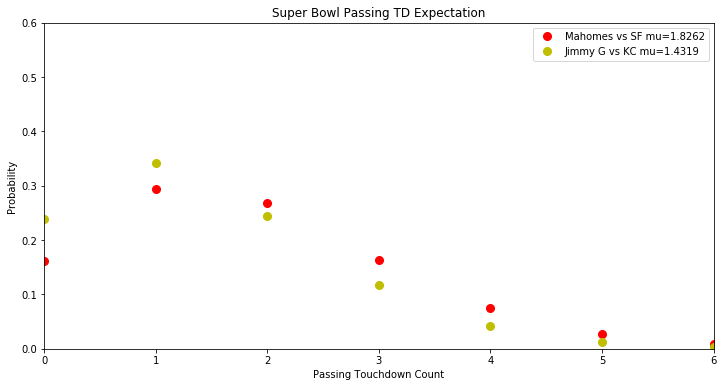

In [51]:
fig = plt.figure(figsize=(12,6))
ax = plt.axes(xlim=(0, 6), ylim=(0, 0.6))
# average, and for poisson, also variance
mu1 = 1.8262
mu2 = 1.4319
# get x values
x = np.arange(0, 7)
ax.set_title("Super Bowl Passing TD Expectation")
ax.set_xlabel("Passing Touchdown Count")
ax.set_ylabel("Probability")
ax.plot(x, ss.poisson.pmf(x, mu1), 'ro', ms=8, label='Mahomes vs SF mu=1.8262')
ax.plot(x, ss.poisson.pmf(x, mu2), 'yo', ms=8, label='Jimmy G vs KC mu=1.4319')
ax.legend()

plt.savefig("./figures/comp_poiss_po.png", bbox_inches='tight')

In [52]:
prob_array = ss.poisson.pmf(x, mu1)

pm_prob = np.round(prob_array[2:].sum(),2) * 100
print("Pat Mahomes has a {}% chance of throwing for 2 or more touchdowns".format(pm_prob))



Pat Mahomes has a 54.0% chance of throwing for 2 or more touchdowns


In [53]:
prob_array = ss.poisson.pmf(x, mu2)
jg_prob = np.round(prob_array[2:].sum(),2) * 100

ss.poisson.pmf(x, mu2)
print("Jimmy G has a {}% chance of throwing for 2 or more touchdowns".format(jg_prob))

Jimmy G has a 42.0% chance of throwing for 2 or more touchdowns
